In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [39]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [3]:
q1 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/q_mpi.npy")

In [4]:
q1.shape

(99, 700)

In [5]:
timelist = np.linspace(0,699,700)

In [34]:
psilist = np.linspace(0,97,98)

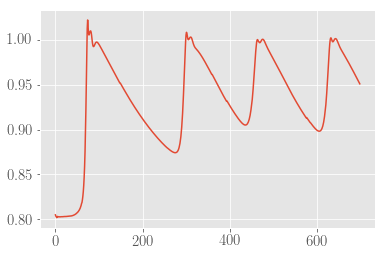

In [7]:
plt.plot(timelist,-q1[0,:])
plt.show()

In [3]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [3]:
filepath = "/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth2.scratch/pixie3d.h5"

In [40]:
pxr.pixieload(filepath)

timesteps= 705
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [55]:
psi = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_start.npy")
X = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/X.npy")
Z = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/Z.npy")

In [6]:
psi = pxr.load_array(3,4,0,10)

In [7]:
psi_mpi = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_mpi.npy")

In [12]:
diff = psi-psi_mpi

In [16]:
diff[:,:,0,40]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


IndexError: index 2 is out of bounds for size 2

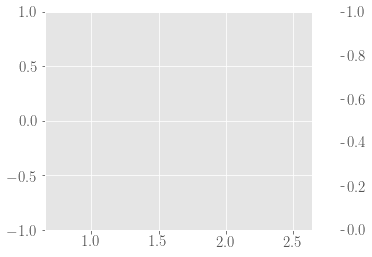

In [13]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],diff[:,:,0,0],100)
plt.colorbar()
plt.show()

In [8]:
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

In [9]:
def setvisible(self,vis):
    for c in self.collections: c.set_visible(vis)
def setanimated(self,ani):
    for c in self.collections: c.set_animated(ani)
        #im.set_visible = types.MethodType(setvisible,im)
        #im.set_animated = types.MethodType(setanimated,im)
        #im.axes = plt.gca()
        #im2 = im.collections
        #im.figure=fig

In [63]:
def anim():
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set_xlabel('R (m)')
    ax.set_ylabel('Z (m)')
    ims = []
    for time in range(psi.shape[3]):
        im = ax.contour(Xn[:,:,0,time],Zn[:,:,0,time],psi[:,:,0,time], 100)
        #im.set_visible = types.MethodType(setvisible,im)
        #im.set_animated = types.MethodType(setanimated,im)
        #im.axes = plt.gca()
        #im.figure = fig
        add_arts = im.collections
        text = 't = '+str(time)
        an = ax.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        #ims.append([im]+[an])
        ims.append(add_arts + [an])
    art_ani = animation.ArtistAnimation(fig, ims, interval=100, repeat_delay=100,blit=False)
    return art_ani

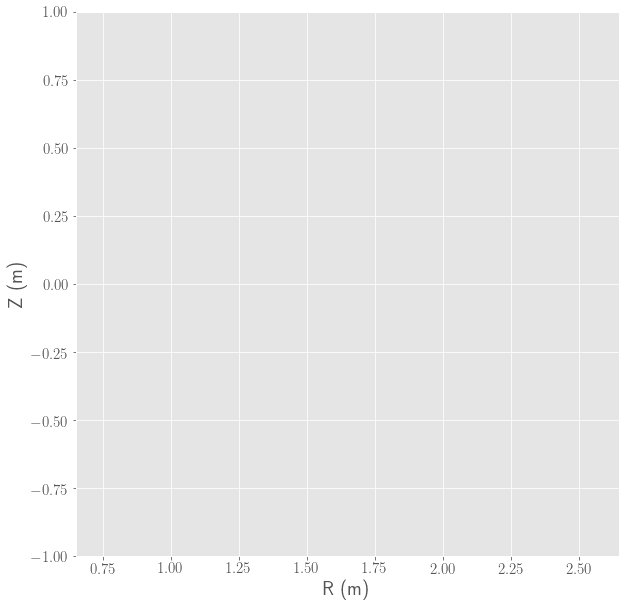

In [64]:
ani=anim();

In [65]:
HTML(ani.to_html5_video())

In [35]:
def anim2():
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set_xlabel('R (m)')
    ax.set_ylabel('Z (m)')
    ims = []
    for time in range(psi.shape[3]):
        im = ax.contour(Xn[:,:,0,0],Zn[:,:,0,0],psi[:,:,0,time])
        #im.set_visible = types.MethodType(setvisible,im)
        #im.set_animated = types.MethodType(setanimated,im)
        #im.axes = plt.gca()
        #im.figure = fig
        add_arts = im.collections
        text = 't = '+str(time)
        an = ax.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        #ims.append([im]+[an])
        ims.append(add_arts + [an])
    art_ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000,blit=False)
    return art_ani

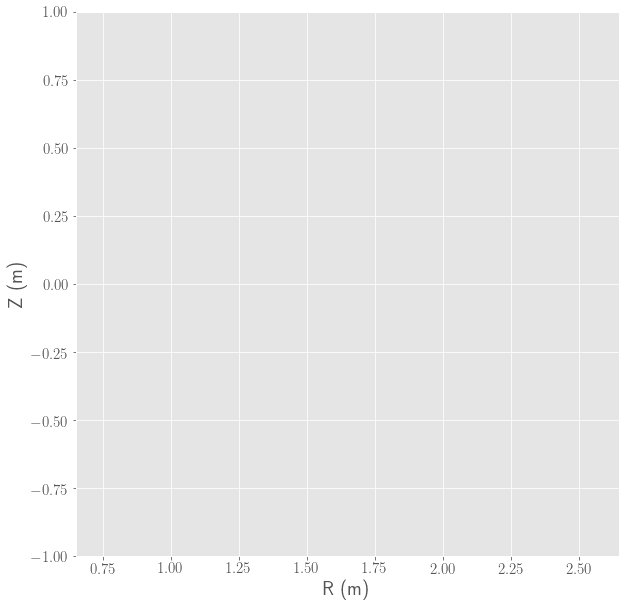

In [36]:
ani2=anim2();

In [37]:
HTML(ani2.to_html5_video())

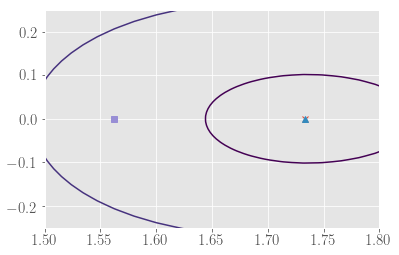

In [227]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi[:,:,0,25])
plt.plot(pxr.X[11,0,0],pxr.Z[11,0,0],"x")
plt.plot(pxr.X[11,64,0],pxr.Z[11,64,0],"^")
plt.plot(pxr.X[11,32,0],pxr.Z[11,32,0],"s")
plt.xlim(1.5,1.8)
plt.ylim(-0.25,0.25)
plt.show()

In [40]:
for t in range(psi.shape[3]):
    print(t,np.unravel_index(np.argmin(-psi[:,:,0,t]),(psi.shape[0],psi.shape[1])))

0 (3, 0)
1 (9, 64)
2 (9, 64)
3 (11, 64)
4 (9, 64)
5 (9, 64)
6 (9, 64)
7 (9, 64)
8 (9, 0)
9 (9, 64)
10 (9, 64)
11 (9, 0)
12 (9, 0)
13 (9, 0)
14 (8, 64)
15 (9, 64)
16 (10, 64)
17 (9, 64)
18 (9, 64)
19 (9, 64)


In [244]:
np.unravel_index(np.argmin(psi[:,:,0,14]),(psi.shape[0],psi.shape[1]))

(9, 64)

In [221]:
print(psi[,0,0,0],psi[3,64,0,0],psi[3,32,0,0])

-0.000464746014386 -0.000464746014386 0.000944398615825


In [107]:
B2c = pxr.load_array(1,1,0,26) 

In [4]:
import h5py
f = h5py.File(filepath,'r')
timesteps = list(f.keys())
variables = list(f[timesteps[0]].keys())
cell_var = list(f[timesteps[0]][variables[5]].keys())
node_var = list(f[timesteps[0]][variables[6]].keys())

In [9]:
tstamp_list = []
for ts in timesteps[:-1]:
    tstamp = ts.split('_')[1]
    tstamp_list.append(int(tstamp))
#print(sorted(tstamp_list))
sorted_tstamp_list = ['Timestep_'+str(x) for x in sorted(tstamp_list)]
print(sorted_tstamp_list)

['Timestep_0', 'Timestep_122', 'Timestep_222', 'Timestep_322', 'Timestep_422', 'Timestep_522', 'Timestep_622', 'Timestep_722', 'Timestep_822', 'Timestep_922', 'Timestep_1022', 'Timestep_1122', 'Timestep_1222', 'Timestep_1322', 'Timestep_1422', 'Timestep_1522', 'Timestep_1622', 'Timestep_1722', 'Timestep_1822', 'Timestep_1922', 'Timestep_2022', 'Timestep_2122', 'Timestep_2222', 'Timestep_2322', 'Timestep_2422', 'Timestep_2522', 'Timestep_2622', 'Timestep_2722', 'Timestep_2822', 'Timestep_2922', 'Timestep_3022', 'Timestep_3122', 'Timestep_3222', 'Timestep_3322', 'Timestep_3422', 'Timestep_3522', 'Timestep_3622', 'Timestep_3722', 'Timestep_3822', 'Timestep_3922', 'Timestep_4022', 'Timestep_4122', 'Timestep_4222', 'Timestep_4322', 'Timestep_4422', 'Timestep_4522', 'Timestep_4622', 'Timestep_4722', 'Timestep_4822', 'Timestep_4922', 'Timestep_5022', 'Timestep_5122', 'Timestep_5222', 'Timestep_5322', 'Timestep_5422', 'Timestep_5522', 'Timestep_5622', 'Timestep_5722', 'Timestep_5822', 'Timeste

In [43]:
variables

['Car_variables',
 'Cnv_variables',
 'Cov_variables',
 'Diagnostics',
 'Perturbations',
 'cells',
 'nodes']

In [15]:
diag = list(f[timesteps[0]][variables[3]].keys())

In [45]:
diag

['E_1',
 'E_2',
 'E_3',
 'Int. heat src',
 'Poloidal flux',
 'Temperature',
 'chi par',
 'chi perp',
 'diff',
 'eta',
 'lambda',
 'local div(B)',
 'local div(J)',
 'local div(V)',
 'nu',
 'q factor']

In [56]:
psi = np.asarray([f[ts][variables[3]][diag[4]] for ts in sorted_tstamp_list[0:20]])

In [10]:
Xn = np.asarray([f[ts][variables[6]][node_var[0]] for ts in sorted_tstamp_list[0:20]])
Zn = np.asarray([f[ts][variables[6]][node_var[2]] for ts in sorted_tstamp_list[0:20]])

In [11]:
Xn.shape

(20, 65, 65, 129)

In [36]:
dX = Xn[0,:,:,:] - Xn[7,:,:,:]

In [37]:
np.all(dX==0.0)

True

In [58]:
psi = np.swapaxes(psi,0,3)
psi = np.swapaxes(psi,1,2)
Xn = np.swapaxes(Xn,0,3)
Xn = np.swapaxes(Xn,1,2)
Zn = np.swapaxes(Zn,0,3)
Zn = np.swapaxes(Zn,1,2)

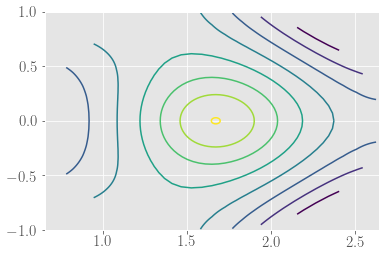

In [59]:
plt.contour(Xn[:,:,0,0],Zn[:,:,0,0],psi[:,:,0,0])
plt.show()

In [35]:
Zc = np.asarray(f[timesteps[0]][variables[6]][cell_var[2]])

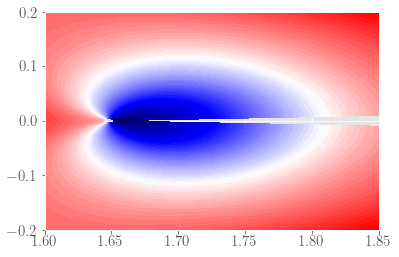

In [111]:
plt.contourf(Xc[:,:,0,],Zc[:,:,0],B2c[:,:,0,-1],100,cmap="seismic")
plt.xlim(1.6,1.85)
plt.ylim(-0.2,0.2)
plt.show()

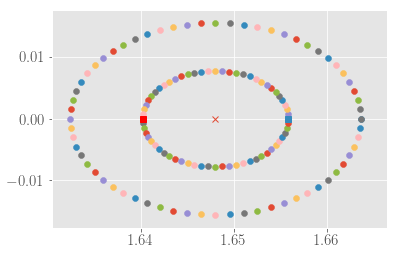

In [125]:
for i in range(psi.shape[1]):
    plt.scatter(pxr.X[1,i,0],pxr.Z[1,i,0])
    plt.scatter(pxr.X[2,i,0],pxr.Z[2,i,0])
plt.plot(pxr.X[0,0,0],pxr.Z[0,0,0],"x")
plt.plot(pxr.X[1,0,0],pxr.Z[1,0,0],"s")
mid = int((psi.shape[1]-1)/2)
plt.plot(pxr.X[1,mid,0],pxr.Z[1,mid,0],"rs")
plt.show()

In [122]:
(psi.shape[1]-1)/2

32.0

In [10]:
Bx = pxr.load_array(0,0,0,26)
By = pxr.load_array(0,1,0,26)
Bz = pxr.load_array(0,2,0,26)
#B1 = pxr.load_array(1,0,0,26) # small2
#B2 = pxr.load_array(1,1,0,26) 
#B3 = pxr.load_array(1,2,0,26)
#B_1 = pxr.load_array(2,0,0,26) # small2
#B_2 = pxr.load_array(2,1,0,26) 
#B_3 = pxr.load_array(2,2,0,26)
psi = pxr.load_array(3,4,0,26)

In [8]:
pxr.X.shape

(129, 65, 65)

In [9]:
psi.shape

(129, 65, 65, 26)

In [9]:
#B1.shape

(128, 65, 65, 26)

In [11]:
Bx.shape

(129, 65, 65, 26)

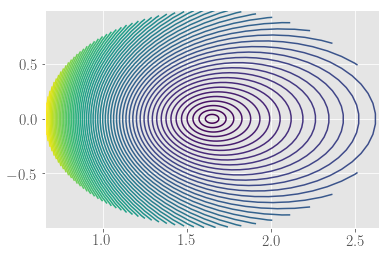

In [11]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B3[:,:,0,0],60)
plt.show()

In [12]:
#psi = pxr.n2c(psi)

## Diagnose t=14 

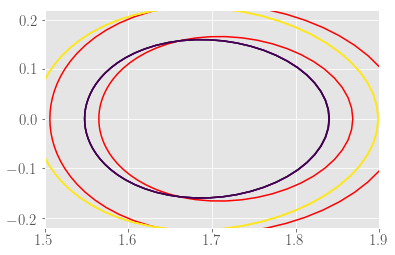

In [13]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,14],levels=[0.01,0.02],colors='r')
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,15],levels=[0.01,0.02])
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,16],levels=[0.01,0.02])
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,17],levels=[0.01,0.02])
plt.xlim(1.5,1.9)
plt.ylim(-0.22,0.22)
plt.show()

It is obvious that the magnetic axis is shifted.

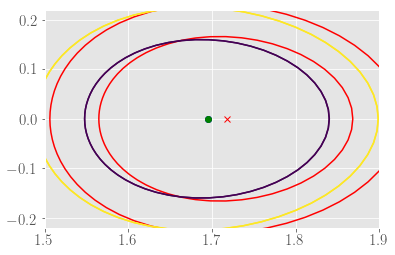

In [14]:
r6,u6 = np.unravel_index(np.argmin(-psi[:,:,0,6]),(psi.shape[0],psi.shape[1]))
r10,u10 = np.unravel_index(np.argmin(-psi[:,:,0,10]),(psi.shape[0],psi.shape[1]))
r12,u12 = np.unravel_index(np.argmin(-psi[:,:,0,12]),(psi.shape[0],psi.shape[1]))
r13,u13 = np.unravel_index(np.argmin(-psi[:,:,0,13]),(psi.shape[0],psi.shape[1]))
r14,u14 = np.unravel_index(np.argmin(-psi[:,:,0,14]),(psi.shape[0],psi.shape[1]))
r15,u15 = np.unravel_index(np.argmin(-psi[:,:,0,15]),(psi.shape[0],psi.shape[1]))
r16,u16 = np.unravel_index(np.argmin(-psi[:,:,0,16]),(psi.shape[0],psi.shape[1]))
r25,u25 = np.unravel_index(np.argmin(-psi[:,:,0,25]),(psi.shape[0],psi.shape[1]))
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,14],levels=[0.01,0.02],colors='r')
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,15],levels=[0.01,0.02])
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,16],levels=[0.01,0.02])
plt.plot(pxr.X[r14,u14,0],pxr.Z[r14,u14,0],'rx')
plt.plot(pxr.X[r15,u15,0],pxr.Z[r15,u15,0],'bo')
plt.plot(pxr.X[r16,u16,0],pxr.Z[r16,u16,0],'go')
plt.xlim(1.5,1.9)
plt.ylim(-0.22,0.22)
plt.show()

Looks like the magnetic axis is being found correctly

Lets see if the magnetic axis point is indeed the first point in the $r(\psi)$ list for those time steps

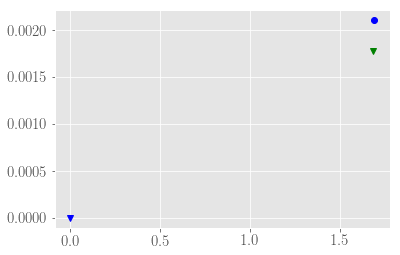

In [52]:
#plt.plot(pxr.X[r14,u14,0],pxr.Z[r14,u14,0],'rx')
#plt.plot(pxr.X[r15,u15,0],pxr.Z[r15,u15,0],'bo')
plt.plot(pxr.X[r10,u10,0],pxr.Z[r10,u10,0],'bo')
#plt.plot(pxr.X[r16,u16,0],pxr.Z[r16,u16,0],'go')
#plt.plot(pxr.X_int((r_of_psi[14,0],0,0)),pxr.Z_int((r_of_psi[14,0],0,0)),"kx")
#plt.plot(pxr.X_int((r_of_psi[15,0],0,0)),pxr.Z_int((r_of_psi[15,0],0,0)),"bv")
plt.plot(pxr.X_int((r_of_psi[16,0],0,0)),pxr.Z_int((r_of_psi[16,0],0,0)),"gv")
plt.plot(pxr.X_int((r_of_psi[10,0],0,0)),pxr.Z_int((r_of_psi[10,0],0,0)),"bv")
plt.show()

It is a little off. Lets see how much off:

In [49]:
print("X err at t=6:",pxr.X[r6,u6,0]-pxr.X_int((r_of_psi[6,0],0,0)),"Z err:",pxr.Z[r6,u6,0]-pxr.Z_int((r_of_psi[6,0],0,0)))
print("X err at t=10:",pxr.X[r10,u10,0]-pxr.X_int((r_of_psi[10,0],0,0)),"Z err:",pxr.Z[r10,u10,0]-pxr.Z_int((r_of_psi[10,0],0,0)))
print("X err at t=12:",pxr.X[r12,u12,0]-pxr.X_int((r_of_psi[12,0],0,0)),"Z err:",pxr.Z[r12,u12,0]-pxr.Z_int((r_of_psi[12,0],0,0)))
print("X err at t=13:",pxr.X[r13,u13,0]-pxr.X_int((r_of_psi[13,0],0,0)),"Z err:",pxr.Z[r13,u13,0]-pxr.Z_int((r_of_psi[13,0],0,0)))
print("X err at t=14:",pxr.X[r14,u14,0]-pxr.X_int((r_of_psi[14,0],0,0)),"Z err:",pxr.Z[r14,u14,0]-pxr.Z_int((r_of_psi[14,0],0,0)))
print("X err at t=15:",pxr.X[r15,u15,0]-pxr.X_int((r_of_psi[15,0],0,0)),"Z err:",pxr.Z[r15,u15,0]-pxr.Z_int((r_of_psi[15,0],0,0)))
print("X err at t=16:",pxr.X[r16,u16,0]-pxr.X_int((r_of_psi[16,0],0,0)),"Z err:",pxr.Z[r16,u16,0]-pxr.Z_int((r_of_psi[16,0],0,0)))
print("X err at t=25:",pxr.X[r25,u25,0]-pxr.X_int((r_of_psi[25,0],0,0)),"Z err:",pxr.Z[r25,u25,0]-pxr.Z_int((r_of_psi[25,0],0,0)))

X err at t=6: 0.000779278206624 Z err: 3.83296531313e-05
X err at t=10: 1.6908777996 Z err: 0.00210837663126
X err at t=12: 0.0132616231952 Z err: 0.000652287479246
X err at t=13: 0.00992080744724 Z err: 0.000487965793221
X err at t=14: 0.00864411043195 Z err: 0.000425170050527
X err at t=15: 0.00795957947499 Z err: 0.000391500644769
X err at t=16: 0.00666631704569 Z err: 0.000327890114021
X err at t=25: 0.00462278163585 Z err: 0.000227376583995


Lets see if the interpolation makes similar errors or smaller

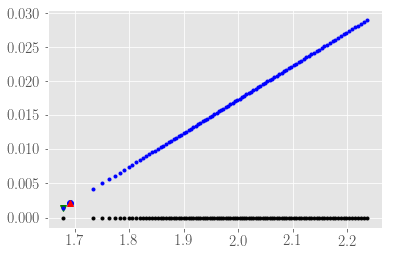

In [86]:
r12log = pxr.CnvNumber2LogicalR(r12)
u12log = pxr.CnvNumber2LogicalU(u12)
plt.plot(pxr.X[r12,u12,0],pxr.Z[r12,u12,0],'bo')
plt.plot(pxr.X_int((r_of_psi[12,0],0,0)),pxr.Z_int((r_of_psi[12,0],0,0)),"gv")
plt.plot(pxr.X_int((r12log,u12log,0)),pxr.Z_int((r12log,u12log,0)),"r^")
plt.plot(pxr.X_int((r_of_psi[12,:],2*np.pi-0.049087385,0)),pxr.Z_int((r_of_psi[12,:],2*np.pi-0.049087385,0)),"k.")
plt.plot(pxr.X_int((r_of_psi[12,:],0,0)),pxr.Z_int((r_of_psi[12,:],0,0)),"b.")
plt.show()

Interpolation is fine. Locating the magnetic axis in the module function is faulty.

Added comment is that it seems that the cell-based grid is off in the $\theta$ direction by half the angle extended by a cell. Which of course has something to do with the addition of an extra cell to enforce periodicity.

Fix location of magnetic axis

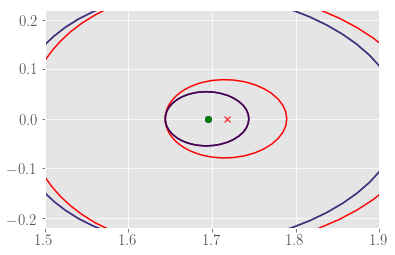

In [8]:
r6,u6 = np.unravel_index(np.argmin(psi[:,:,0,6]),(psi.shape[0],psi.shape[1]))
r10,u10 = np.unravel_index(np.argmin(psi[:,:,0,10]),(psi.shape[0],psi.shape[1]))
r12,u12 = np.unravel_index(np.argmin(psi[:,:,0,12]),(psi.shape[0],psi.shape[1]))
r13,u13 = np.unravel_index(np.argmin(psi[:,:,0,13]),(psi.shape[0],psi.shape[1]))
r14,u14 = np.unravel_index(np.argmin(psi[:,:,0,14]),(psi.shape[0],psi.shape[1]))
r15,u15 = np.unravel_index(np.argmin(psi[:,:,0,15]),(psi.shape[0],psi.shape[1]))
r16,u16 = np.unravel_index(np.argmin(psi[:,:,0,16]),(psi.shape[0],psi.shape[1]))
r25,u25 = np.unravel_index(np.argmin(psi[:,:,0,25]),(psi.shape[0],psi.shape[1]))
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi[:,:,0,14],colors='r')
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi[:,:,0,15])
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi[:,:,0,16])
plt.plot(pxr.X[r14,u14,0],pxr.Z[r14,u14,0],'rx')
plt.plot(pxr.X[r15,u15,0],pxr.Z[r15,u15,0],'bo')
plt.plot(pxr.X[r16,u16,0],pxr.Z[r16,u16,0],'go')
plt.xlim(1.5,1.9)
plt.ylim(-0.22,0.22)
plt.show()

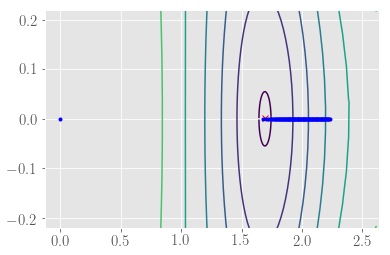

In [117]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,12])
plt.plot(pxr.X[r12,u12,0],pxr.Z[r12,u12,0],'rx')
plt.plot(pxr.X_int((r_of_psi2[:],2*np.pi-0.049087385,0)),pxr.Z_int((r_of_psi2[:],2*np.pi-0.049087385,0)),"b.")
#plt.xlim(1.5,1.9)
plt.ylim(-0.22,0.22)
plt.show()

Load new arrays

In [6]:
psi = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_start.npy")

Load magnetic fields

In [23]:
#B1 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B1n_start.npy")
#B2 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B2n_start.npy")
B3 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B3n_start.npy")

In [10]:
pxr.Axes_of_Interpolation(B1)
pxr.Grid_Interpolations(psi,B1,B2,B3)
pxr.Calculation_of_Units_and_Sizes()

Logical Grid Interpolations done. All array (A) interpolators take A_int.
Units and sizes calculated.


See if normalization is being done correctly

In [11]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [12]:
B1tor = np.mean(B1,axis=2)
B2tor = np.mean(B2,axis=2)

In [13]:
psi_min_tor,norm_tor = pxr.Normalization_numbers(psi,B1tor,B2tor)

t= 0 is done
t= 10 is done
t= 20 is done


In [25]:
psi_min_pl,norm_pl = pxr.Normalization_numbers(psi,B1[:,:,0,:],B2[:,:,0,:])

t= 0 is done
t= 10 is done
t= 20 is done


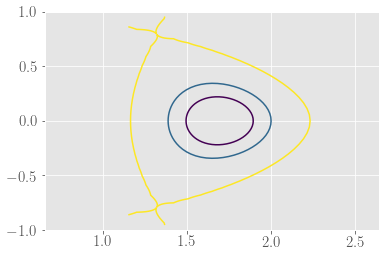

In [23]:
t=13
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(psi[:,:,0,t]-psi_min_tor[t])/(norm_tor[t]-psi_min_tor[t]),levels=[0.25,0.5,1.0])
plt.show()

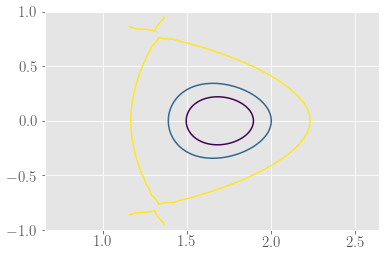

In [27]:
t=4
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(psi[:,:,0,t]-psi_min_pl[t])/(norm_pl[t]-psi_min_pl[t]),levels=[0.25,0.5,1.0])
plt.show()

In [40]:
print(psi[0,0,0,0])
print(psi[0,-1,0,0])

-0.000117964268998
-0.000117964268998


Load magnetic field from derivatives

In [17]:
B1d = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B1d_start.npy")
B2d = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B2d_start.npy")

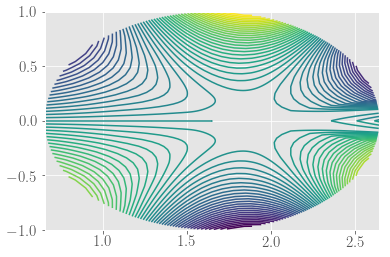

In [18]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B1d[:,:,0,20],50)
plt.show()

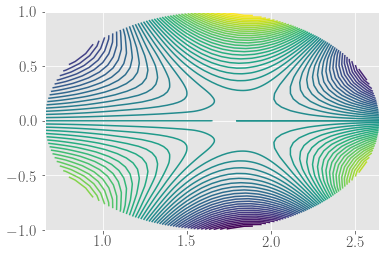

In [38]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B1[:,:,0,20],50)
plt.show()

Load magnetic field with new derivative function

In [51]:
B1d2 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B1d2_start.npy")
B2d2 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B2d2_start.npy")

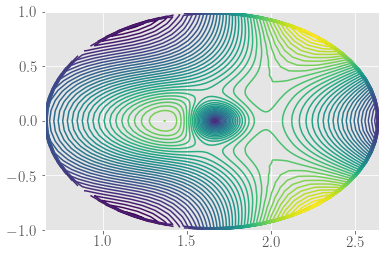

In [52]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B2d2[:,:,0,0],50)
plt.show()

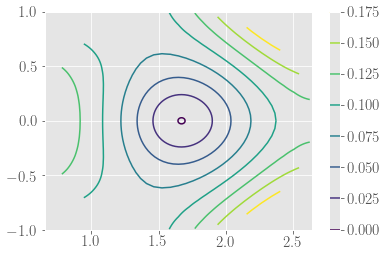

In [54]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,0])
plt.colorbar()
plt.show()

In [122]:
pxr.Axes_of_Interpolation(B1d2)
pxr.Grid_Interpolations(-psi,B1d2,B2d2,B3)
pxr.Calculation_of_Units_and_Sizes()

Logical Grid Interpolations done. All array (A) interpolators take A_int.
Units and sizes calculated.


Normalization with derivative arrays

In [123]:
psi_min_d,norm_d = pxr.Normalization_numbers(-psi,B1d2[:,:,0,:],B2d2[:,:,0,:])

t= 0 is done
t= 10 is done
t= 20 is done


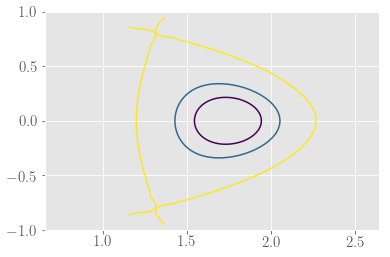

In [152]:
t=25
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psi[:,:,0,t]-psi_min_d[t])/(norm_d[t]-psi_min_d[t]),levels=[0.25,0.5,1.0])
plt.show()

## Diagnose why t=25 is off in normalization

r,u of X-point: 0.873187801474 4.3140940151
norm: 0.07768563813672101
r_ma,u_ma: 0.0859375 0.0
MA index: 11 0
psi at MA: -0.00541597512931
psi_min direct: -0.00541597512931
psi_min interpolated -0.005415975129314382


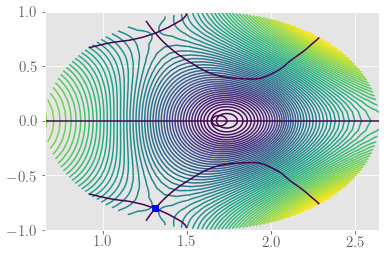

In [104]:
x_X,y_X = pxr.findXpoint(B1d2[:,:,0,:],B2d2[:,:,0,:],t=25)
x_X_log_grid,y_X_log_grid = pxr.pntCnvInGrid_simple_toroidal(x_X[0],y_X[0])
print("r,u of X-point:",x_X_log_grid,y_X_log_grid)
norm = pxr.psi_int((x_X_log_grid,y_X_log_grid,0,26))
print("norm:",norm)
psi_min_direct = np.amin(-psi[:,:,0,25])
r_ma_ind,u_ma_ind = np.unravel_index(np.argmin(-psi[:,:,0,25]),(psi.shape[0],psi.shape[1]))
r_ma = pxr.CnvNumber2LogicalR(r_ma_ind)
u_ma = pxr.CnvNumber2LogicalU(u_ma_ind)
print("r_ma,u_ma:",r_ma,u_ma)
print("MA index:",r_ma_ind,u_ma_ind)
print("psi at MA:",-psi[r_ma_ind,u_ma_ind,0,25])
psi_min_interp = pxr.psi_int((r_ma,u_ma,0,26))
print("psi_min direct:",psi_min_direct)
print("psi_min interpolated",psi_min_interp)
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,25],60)
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B1d2[:,:,0,25],levels=[0.0])
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B2d2[:,:,0,25],levels=[0.0])
plt.plot(x_X,y_X,'rx')
plt.plot(pxr.X_int((x_X_log_grid,y_X_log_grid,0)),pxr.Z_int((x_X_log_grid,y_X_log_grid,0)),'bs')
plt.show()

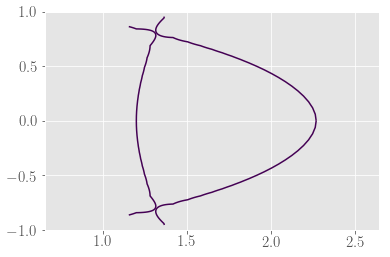

In [106]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psi[:,:,0,25]-psi_min_interp)/(norm-psi_min_interp),levels=[1.0])
plt.show()

In [114]:
t_ran = np.linspace(0,psi.shape[3]-1,num=psi.shape[3])    

In [119]:
rran = np.linspace(0.0,1.0,num=psi.shape[0])

In [153]:
ttheta = np.linspace(0.0,2.0*np.pi,num=psi.shape[1])

In [158]:
rran[63]

0.4921875

Fixed! It was the number of points in the interpolation axis of the time dimension

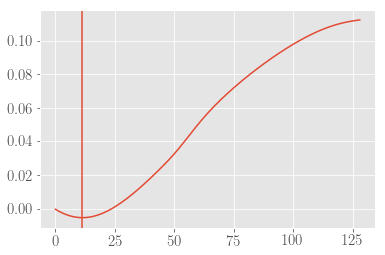

In [84]:
t=25
#plt.plot([x for x in range(psi.shape[0])],(psi[:,0,0,t]-psi_min_d[t])/(norm_d[t]-psi_min_d[t]))
plt.plot([x for x in range(psi.shape[0])],psi[:,0,0,t])
r_ind = np.argmin(psi[:,0,0,t])
plt.axvline(x=r_ind)
#plt.axhline(y=1.0)
plt.show()

In [85]:
for t in range(26):
    print("t=",t,np.unravel_index(np.argmin(psi[:,:,0,t]),(psi.shape[0],psi.shape[1])))
    

t= 0 (3, 64)
t= 1 (6, 0)
t= 2 (6, 0)
t= 3 (9, 64)
t= 4 (6, 0)
t= 5 (6, 0)
t= 6 (6, 0)
t= 7 (6, 0)
t= 8 (6, 0)
t= 9 (6, 0)
t= 10 (6, 64)
t= 11 (6, 0)
t= 12 (6, 0)
t= 13 (6, 0)
t= 14 (9, 64)
t= 15 (6, 0)
t= 16 (6, 0)
t= 17 (6, 0)
t= 18 (6, 0)
t= 19 (6, 0)
t= 20 (6, 0)
t= 21 (6, 0)
t= 22 (6, 0)
t= 23 (6, 0)
t= 24 (6, 0)
t= 25 (11, 0)


In [174]:
from scipy.interpolate import interp1d

In [77]:
r_of_psi2 = r_psi_list(12,psi,psi_min_d,norm_d)

r,u at MA: 0.046875 0.0
psi_min from interpolation: -0.001359218369231115
psi min from function: -0.00135679407073
r,psi: 0.046875 -2.95539142952e-05
r,psi: 0.0565025252525 0.000670550680003
r,psi: 0.0661300505051 0.00253335681643
r,psi: 0.0757575757576 0.00555894669611
r,psi: 0.0853851010101 0.00974659185044
r,psi: 0.0950126262626 0.015224402349
r,psi: 0.104640151515 0.0219188057955
r,psi: 0.114267676768 0.0297725995882
r,psi: 0.12389520202 0.0387828755249
r,psi: 0.133522727273 0.0490176536908
r,psi: 0.143150252525 0.0605086774408
r,psi: 0.152777777778 0.0731321058688
r,psi: 0.16240530303 0.0868721024999
r,psi: 0.172032828283 0.101719165985
r,psi: 0.181660353535 0.11776911189
r,psi: 0.191287878788 0.134815510386
r,psi: 0.20091540404 0.152799105282
r,psi: 0.210542929293 0.171648790269
r,psi: 0.220170454545 0.191362690515
r,psi: 0.229797979798 0.211754002967
r,psi: 0.239425505051 0.232690623905
r,psi: 0.249053030303 0.254074815154
r,psi: 0.258680555556 0.27584507155
r,psi: 0.26830808080

Interpolated points: 1.6947746447699141 0.0
List points: 1.6952610360074243 3.383162619235992e-21


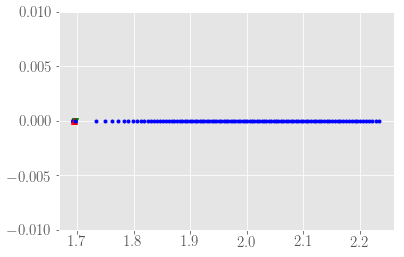

In [79]:
r12log = pxr.CnvNumber2LogicalR(r12)
u12log = pxr.CnvNumber2LogicalU(u12)
plt.plot(pxr.X[r12,u12,0],pxr.Z[r12,u12,0],'bo')
print("Interpolated points:",pxr.X_int((r12log,u12log,0)),pxr.Z_int((r12log,u12log,0)))
print("List points:",pxr.X_int((r_of_psi2[0],0,0)),pxr.Z_int((r_of_psi2[0],0,0)))
plt.plot(pxr.X_int((r_of_psi2[0],0,0)),pxr.Z_int((r_of_psi2[0],0,0)),"gv")
plt.plot(pxr.X_int((r12log,u12log,0)),pxr.Z_int((r12log,u12log,0)),"r^")
plt.plot(pxr.X_int((r_of_psi2[:],0,0)),pxr.Z_int((r_of_psi2[:],0,0)),"b.")
plt.ylim(-0.01,0.01)
plt.show()

In [45]:
u12log

0.0

In [74]:
psi.shape

(128, 65, 65, 26)

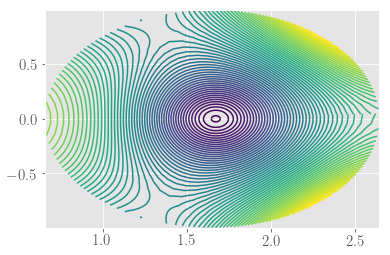

In [9]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,0],60)
plt.show()

In [17]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [88]:
pxr.Axes_of_Interpolation(B1)
pxr.Grid_Interpolations(-psi[:,:,0,:],B1,B2,B3)
pxr.Calculation_of_Units_and_Sizes()

Logical Grid Interpolations done. All array (A) interpolators take A_int.
Units and sizes calculated.


In [26]:
B_1tor = np.mean(B_1,axis=2)
B_2tor = np.mean(B_2,axis=2)

In [27]:
B1_abs = np.multiply(pxr.B1tor,B_1tor)
B2_abs = np.multiply(pxr.B2tor,B_2tor)

In [28]:
from scipy.interpolate import interp1d

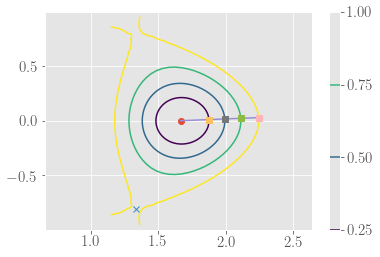

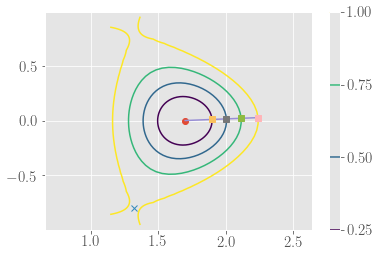

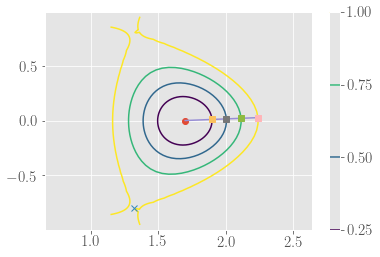

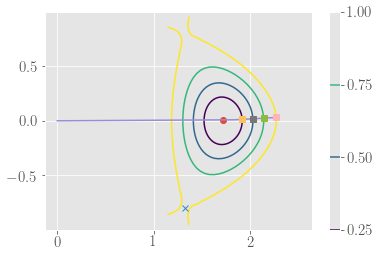

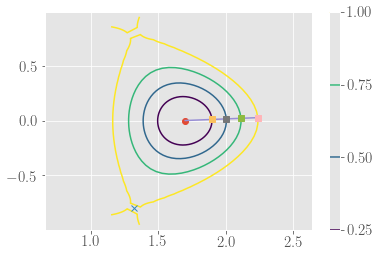

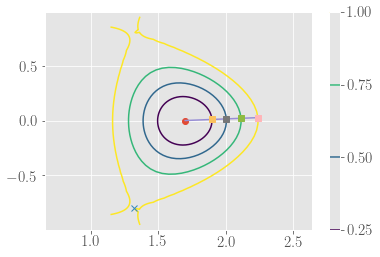

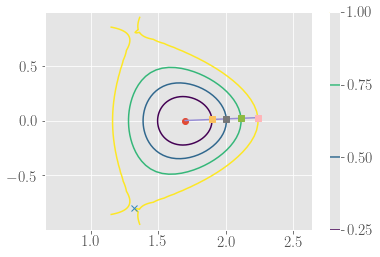

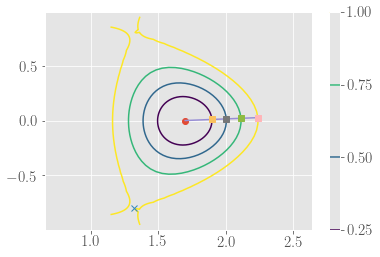

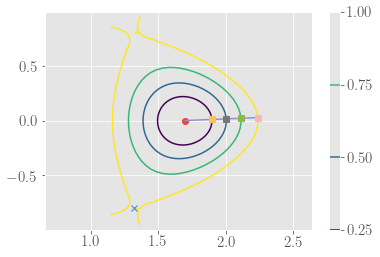

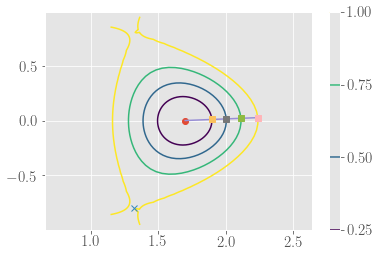

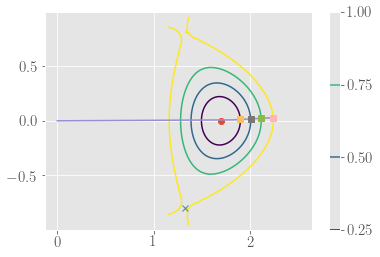

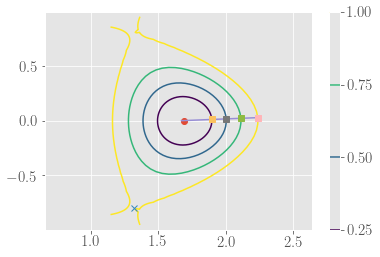

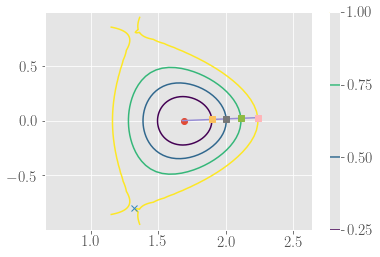

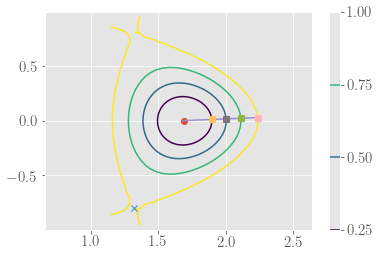

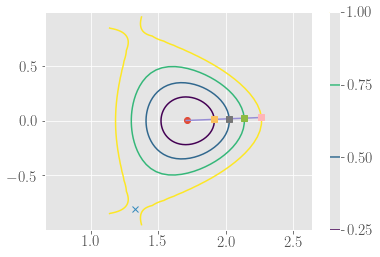

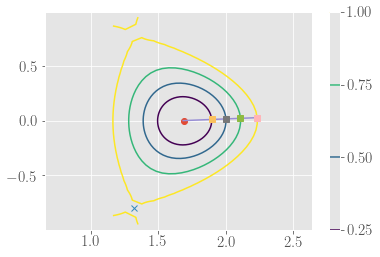

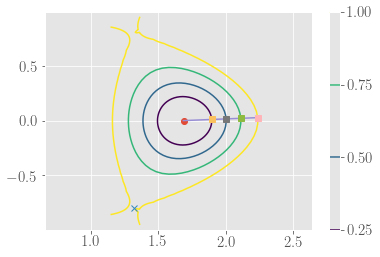

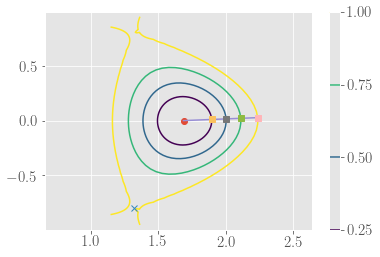

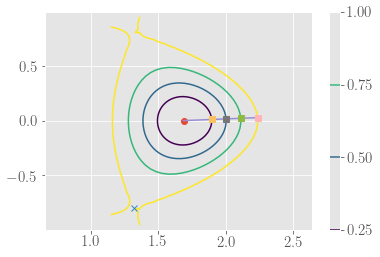

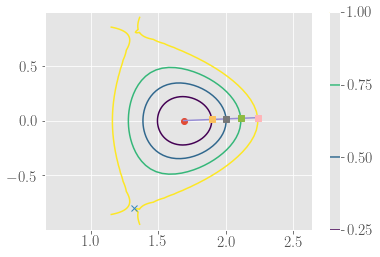

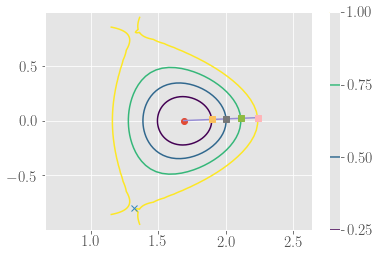

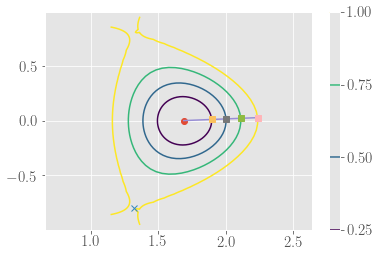

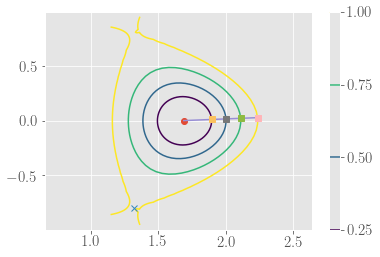

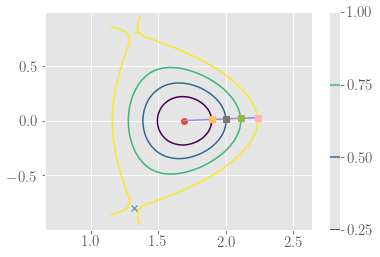

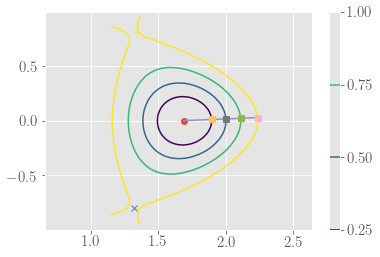

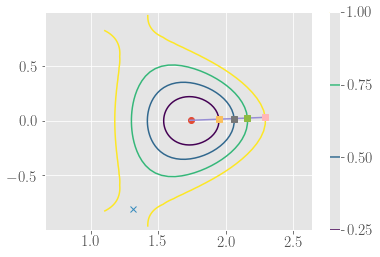

In [14]:
for t in range(psi.shape[3]):
    psi_min = np.amin(-psi[:,:,0,t])
    ma_r_ind,ma_u_ind = np.unravel_index(np.argmin(-psi[:,:,0,t]),(psi.shape[0],psi.shape[1]))
    x_X,y_X = pxr.findXpoint(B1[:,:,0,:],B2[:,:,0,:],t)
    x_X_log_grid,y_X_log_grid = pxr.pntCnvInGrid_simple_toroidal(x_X[0],y_X[0])
    norm = pxr.psi_int((x_X_log_grid,y_X_log_grid,t))
    psin = (-psi[:,:,0,t]-psi_min)/(norm-psi_min)
    psin_list = np.linspace(0.0,1.0,101)
    p_N = psin[ma_r_ind:,0]
    r_log_mag_axis = pxr.CnvNumber2LogicalR(ma_r_ind)
    R_list = np.linspace(r_log_mag_axis,1,len(p_N))
    r_of_psin = interp1d(p_N, R_list, kind = "quadratic", fill_value = "extrapolate")
    r_of_psi_list = r_of_psin(psin_list)
    plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psin[:,:],levels=[0.0,0.25,0.5,0.75,1.00])
    plt.colorbar()
    plt.plot(pxr.X[ma_r_ind,ma_u_ind,0],pxr.Z[ma_r_ind,ma_u_ind,0],'o')
    plt.plot(x_X,y_X,'x')
    plt.plot(pxr.X_int((r_of_psi_list[::10],0,0)),pxr.Z_int((r_of_psi_list[::10],0,0)))
    plt.plot(pxr.X_int((r_of_psi_list[50],0,0)),pxr.Z_int((r_of_psi_list[50],0,0)),'s')
    plt.plot(pxr.X_int((r_of_psi_list[25],0,0)),pxr.Z_int((r_of_psi_list[25],0,0)),'s')
    plt.plot(pxr.X_int((r_of_psi_list[75],0,0)),pxr.Z_int((r_of_psi_list[75],0,0)),'s')
    plt.plot(pxr.X_int((r_of_psi_list[-1],0,0)),pxr.Z_int((r_of_psi_list[-1],0,0)),'s')
    plt.show()

I'm making about $3\%$ error in the largest excursion of the magnetic axis at t=25

In [24]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B1_start.npy",B1)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B2_start.npy",B2)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B3_start.npy",B3)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_start.npy",-psi[:,:,0,:])

In [29]:
psi_min, norm = pxr.Normalization_numbers(-psi[:,:,0,:],B1[:,:,0,:],B2[:,:,0,:])

t= 0 is done
t= 10 is done
t= 20 is done


In [30]:
r_of_psi, r_ma = pxr.create_r_psi_list(-psi[:,:,0,:],B1[:,:,0,:],B2[:,:,0,:])

t= 0 is done
t= 10 is done
t= 20 is done


In [27]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_min_start.npy",psi_min)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/norm_start.npy",norm)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/r_of_psi_start.npy",r_of_psi)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/rmaxis_start.npy",r_ma)

## Psi with current loading (periodicity + f2c)

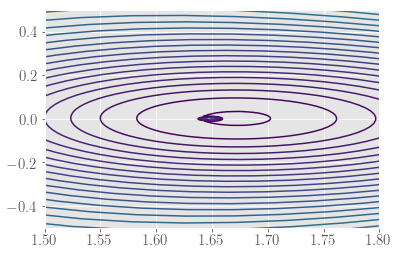

In [75]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,0],50)
plt.xlim(1.5,1.8)
plt.ylim(-0.5,0.5)
plt.show()

The bubble is there

## Psi toroidally averaged (periodicity + f2c)

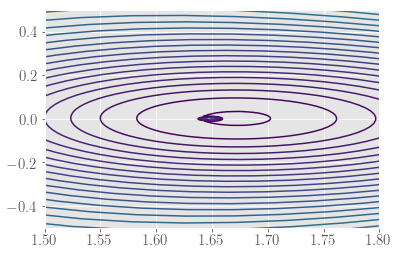

In [77]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psit[:,:,0],50)
plt.xlim(1.5,1.8)
plt.ylim(-0.5,0.5)
plt.show()

The bubble is there

## Psi without any processing

In [78]:
import h5py

In [95]:
f = h5py.File(filepath,'r')
timesteps = list(f.keys())
variables = list(f[timesteps[0]].keys())
cnv_var = list(f[timesteps[0]][variables[1]].keys())
diag_var = list(f[timesteps[0]][variables[3]].keys())
cell_var = list(f[timesteps[0]][variables[5]].keys())
node_var = list(f[timesteps[0]][variables[6]].keys())
Xc = np.asarray(f[timesteps[0]][variables[5]][cell_var[0]])
Zc = np.asarray(f[timesteps[0]][variables[5]][cell_var[2]])
Xn = np.asarray(f[timesteps[0]][variables[6]][cell_var[0]])
Zn = np.asarray(f[timesteps[0]][variables[6]][node_var[2]])
p = np.asarray([f[ts][variables[3]][diag_var[4]] for ts in timesteps[0:26]])

In [96]:
Xc.shape

(64, 64, 128)

In [97]:
Xn.shape

(65, 65, 129)

In [98]:
p.shape

(26, 65, 65, 129)

In [99]:
Xc = np.swapaxes(Xc,0,2)
Zc = np.swapaxes(Zc,0,2)
Xn = np.swapaxes(Xn,0,2)
Zn = np.swapaxes(Zn,0,2)
p = np.swapaxes(p,0,3)
p = np.swapaxes(p,1,2)

In [100]:
Xn.shape

(129, 65, 65)

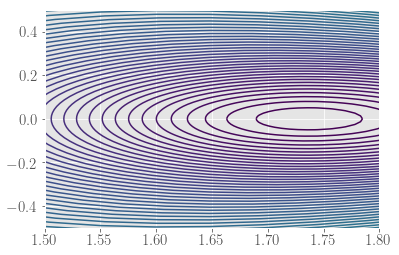

In [101]:
plt.contour(Xn[:,:,0],Zn[:,:,0],-p[:,:,0,25],100)
plt.xlim(1.5,1.8)
plt.ylim(-0.5,0.5)
plt.show()

The bubble is not there!

### Looks like the problem is in the processing of the cell variables. What if we make everything a node variable? 

In [104]:
b1 = np.asarray([f[ts][variables[1]][cnv_var[0]] for ts in timesteps[0:26]])

In [105]:
b1.shape

(26, 64, 64, 128)

## Diagnosing t=4, t=14

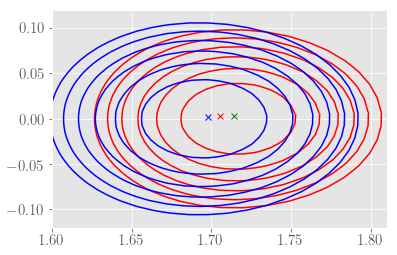

In [41]:
t1=14
t2=4
CS1 = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psi[:,:,0,t1]-psi_min[t1])/(norm[t1]-psi_min[t1]),levels=[0.01,0.02,0.03,0.04,0.05,0.06],colors='r')
CS1 = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psi[:,:,0,t2]-psi_min[t2])/(norm[t2]-psi_min[t2]),levels=[0.01,0.02,0.03,0.04,0.05,0.06],colors='b')
plt.plot(pxr.X_int((r_of_psi[4,0],0,0)),pxr.Z_int((r_of_psi[4,0],0,0)),'bx')
plt.plot(pxr.X_int((r_of_psi[14,0],0,0)),pxr.Z_int((r_of_psi[14,0],0,0)),'rx')
plt.plot(pxr.X[8,64,0],pxr.Z[8,64,0],'gx')
plt.xlim(1.6,1.81)
plt.ylim(-0.12,0.12)
plt.show()

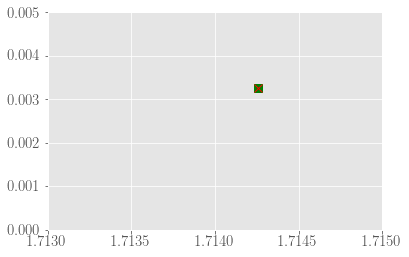

In [73]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,14],100)
plt.plot(pxr.X[8,64,0],pxr.Z[8,64,0],'gs',markersize=8)
plt.plot(pxr.X[8,0,0],pxr.Z[8,0,0],'rx',markersize=8)
plt.xlim(1.713,1.715)
plt.ylim(0.00,0.005)

plt.show()

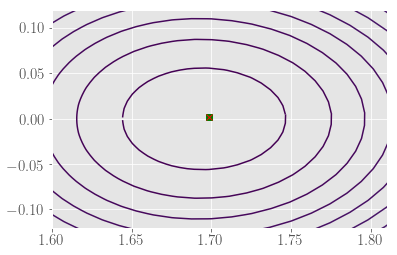

In [56]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,4],100)
plt.plot(pxr.X[6,64,0],pxr.Z[6,64,0],'gs')
plt.plot(pxr.X[6,0,0],pxr.Z[6,0,0],'rx')
plt.xlim(1.6,1.81)
plt.ylim(-0.12,0.12)
plt.show()

In [48]:
for t in range(26):
    print("t=",t)
    print(np.unravel_index(np.argmin(-psi[:,:,0,t]),(psi.shape[0],psi.shape[1])))

t= 0
(2, 64)
t= 1
(6, 64)
t= 2
(6, 64)
t= 3
(8, 64)
t= 4
(6, 64)
t= 5
(6, 64)
t= 6
(6, 64)
t= 7
(6, 64)
t= 8
(6, 64)
t= 9
(6, 64)
t= 10
(5, 64)
t= 11
(5, 64)
t= 12
(5, 64)
t= 13
(5, 64)
t= 14
(8, 64)
t= 15
(5, 64)
t= 16
(5, 64)
t= 17
(5, 64)
t= 18
(5, 64)
t= 19
(5, 64)
t= 20
(5, 64)
t= 21
(5, 64)
t= 22
(5, 64)
t= 23
(5, 64)
t= 24
(5, 64)
t= 25
(11, 64)


In [43]:
psi.shape

(128, 65, 65, 26)

## Workflow with corrected module

1) Load node data for X,Z,$\psi$ and $B^3$. Save them in file.
2) Differentiate $\psi$ with Julia to get $B^1$, $B^2$. Interpolate $B^3$ in nodes. Save them in file.
3) Load data from files and run the routines for interpolation.
4) Calculate normalization numbers and save them in file.
5) Calculate $r(\psi,t)$ and save it in file. 

Load the saved data for the first 26 time points of the simulation

In [164]:
B1 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B1d2_start.npy")
B2 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B2d2_start.npy")
B3 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B3n_start.npy")
psi = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_start.npy")

Make sure they have the right dimension and distinguish the sign of psi

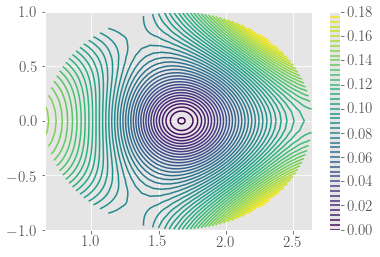

In [168]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi[:,:,0,0],50)
plt.colorbar()
plt.show()

This $\psi$ is positive

Do the interpolations:

In [169]:
pxr.Axes_of_Interpolation(B1)
pxr.Grid_Interpolations(psi,B1,B2,B3)
pxr.Calculation_of_Units_and_Sizes()

Logical Grid Interpolations done. All array (A) interpolators take A_int.
Units and sizes calculated.


In [170]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [171]:
psi_min,norm = pxr.Normalization_numbers(psi,B1,B2)

t= 0 is done
t= 10 is done
t= 20 is done


Calculation of $r(\psi)$ with the caveat that the magnetic axis is always at $\theta=0$.

Lets first make sure that the axis and the points are found correctly

In [185]:
def r_psi_list(t,psi,psi_min,norm):
    r_ma,u_ma = np.unravel_index(np.argmin(psi[:,:,0,t]),(psi.shape[0],psi.shape[1]))
    print("r,u index:",r_ma,u_ma)
    r_ma_log = pxr.CnvNumber2LogicalR(r_ma)
    u_ma_log = pxr.CnvNumber2LogicalU(u_ma)
    print("r,u at MA:",r_ma_log,u_ma_log)
    R_list = np.linspace(r_ma_log,1,100)
    psi_list = []
    print("psi_min from interpolation:",pxr.psi_int((r_ma_log,u_ma_log,0,t)))
    print("psi min from function:",psi_min[t])
    for r in R_list:
        psi_val = (pxr.psi_int((r,0,0,t))-psi_min[t])/(norm[t]-psi_min[t])
        psi_list.append(psi_val)
        print("r,psi:",r,psi_val)
        
    r_of_psin = interp1d(psi_list, R_list, kind = "quadratic", fill_value = "extrapolate")
    #r_of_psi_list = r_of_psin(np.sqrt(psin_list))
    psin_list = np.linspace(0.0,1.0,101)
    r_of_psi_list = r_of_psin(psin_list)
    return r_of_psi_list
    #return psi_list

In [186]:
rp12 = r_psi_list(12,psi,psi_min,norm)

r,u index: 6 0
r,u at MA: 0.046875 0.0
psi_min from interpolation: -0.001356794070729587
psi min from function: -0.00135679407073
r,psi: 0.046875 0.0
r,psi: 0.0565025252525 0.000707427340663
r,psi: 0.0661300505051 0.00257803822422
r,psi: 0.0757575757576 0.00561191491789
r,psi: 0.0853851010101 0.00980834080722
r,psi: 0.0950126262626 0.0152954769309
r,psi: 0.104640151515 0.0219997239387
r,psi: 0.114267676768 0.0298638319033
r,psi: 0.12389520202 0.0388848710329
r,psi: 0.133522727273 0.0491307938359
r,psi: 0.143150252525 0.0606332012082
r,psi: 0.152777777778 0.0732680617685
r,psi: 0.16240530303 0.0870192473515
r,psi: 0.172032828283 0.101876940216
r,psi: 0.181660353535 0.117936529627
r,psi: 0.191287878788 0.134991315956
r,psi: 0.20091540404 0.152981626984
r,psi: 0.210542929293 0.171835992652
r,psi: 0.220170454545 0.191552170818
r,psi: 0.229797979798 0.21194394647
r,psi: 0.239425505051 0.232879996289
r,psi: 0.249053030303 0.254263322381
r,psi: 0.258680555556 0.276032994385
r,psi: 0.268308080

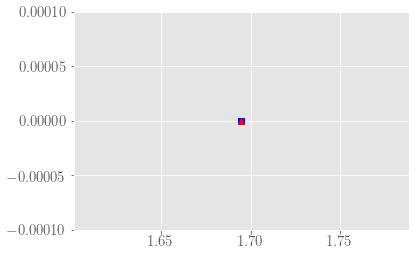

In [192]:
#plt.plot(pxr.X_int((rp12[:],0,0)),pxr.Z_int((rp12[:],0,0)))
plt.plot(pxr.X[6,0,0],pxr.Z[6,0,0],'bs')
plt.plot(pxr.X_int((0.046875,0,0)),pxr.Z_int((0.046875,0,0)),'r^')
#plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(psi[:,:,0,12]-psi_min[12])/(norm[12]-psi_min[12]),levels=[1.0])
plt.ylim(-0.0001,0.0001)
plt.show()

Everything seems to be going fine. Now calculate the array from the internal function.

In [197]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [198]:
r_of_psi,rmaxis = pxr.create_r_psi_list(psi,B1,B2)

t= 0 is done
t= 10 is done
t= 20 is done


In [199]:
r_of_psi.shape

(26, 101)

Save files for use in Julia module

In [200]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_min_start.npy",psi_min)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/norm_start.npy",norm)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/r_of_psi_start.npy",r_of_psi)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/rmaxis_start.npy",rmaxis)